# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | touros
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | gadzhiyevo
Processing Record 8 of Set 1 | turkmenbasy
Processing Record 9 of Set 1 | ust-nera
Processing Record 10 of Set 1 | atafu village
Processing Record 11 of Set 1 | antofagasta
Processing Record 12 of Set 1 | kudahuvadhoo
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | masterton
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | peniche
Processing Record 22 of Set 1 | nar'yan-mar
Processing

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.85,85,100,7.76,PN,1699922950
1,bethel,41.3712,-73.4140,6.08,75,75,1.54,US,1699922904
2,blackmans bay,-43.0167,147.3167,17.51,42,23,5.28,AU,1699922950
3,touros,-5.1989,-35.4608,26.68,79,94,5.27,BR,1699922951
4,anadyr,64.7500,177.4833,-11.72,72,13,10.00,RU,1699922951


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.85,85,100,7.76,PN,1699922950
1,bethel,41.3712,-73.4140,6.08,75,75,1.54,US,1699922904
2,blackmans bay,-43.0167,147.3167,17.51,42,23,5.28,AU,1699922950
3,touros,-5.1989,-35.4608,26.68,79,94,5.27,BR,1699922951
4,anadyr,64.7500,177.4833,-11.72,72,13,10.00,RU,1699922951


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

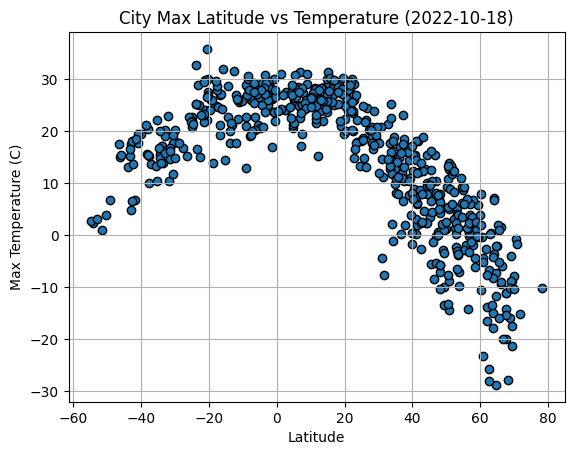

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df['Lat'], y = city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

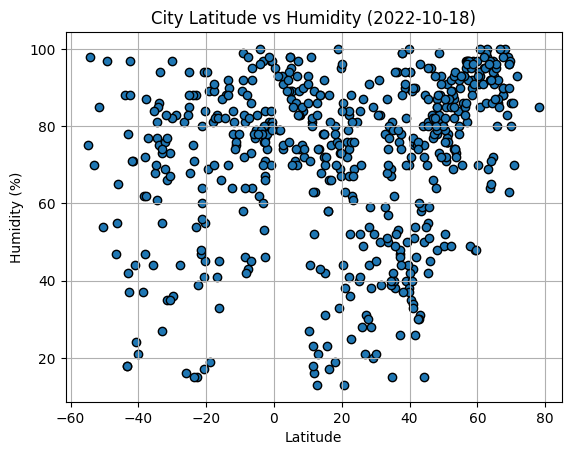

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x = city_data_df['Lat'], y = city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

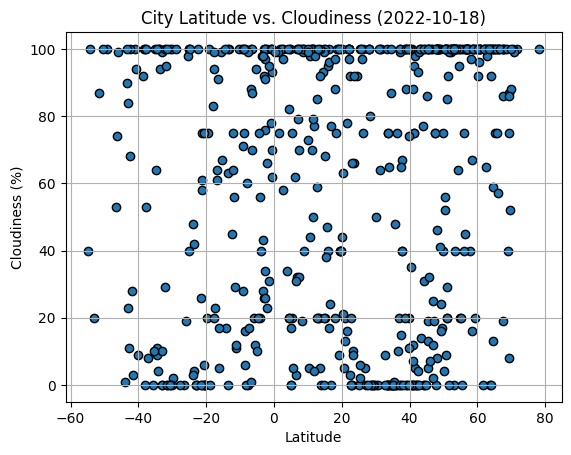

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x = city_data_df['Lat'], y = city_data_df['Cloudiness'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

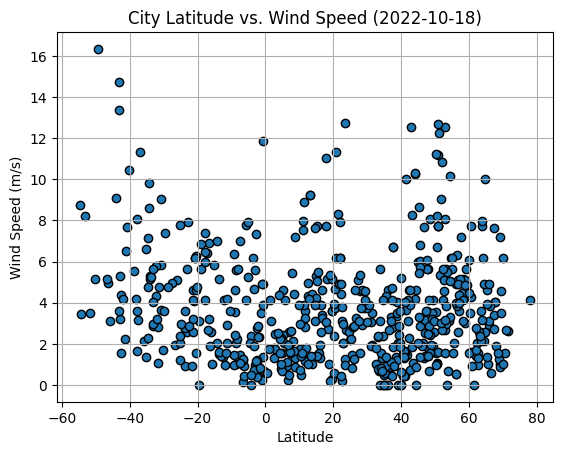

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x = city_data_df['Lat'], y = city_data_df['Wind Speed'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def lin_regress_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x  + {intercept:.2f}"
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min()+10, y_values.min()+10), color="red")
    plt.xlabel(f"{x_values}")
    print(f"The r-squared is {rvalue*rvalue}")

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,6.08,75,75,1.54,US,1699922904
4,anadyr,64.7500,177.4833,-11.72,72,13,10.00,RU,1699922951
6,gadzhiyevo,69.2551,33.3362,-8.77,96,87,1.01,RU,1699922951
7,turkmenbasy,40.0222,52.9552,12.43,94,100,0.00,TM,1699922951
8,ust-nera,64.5667,143.2000,-28.83,97,59,2.16,RU,1699922951


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.85,85,100,7.76,PN,1699922950
2,blackmans bay,-43.0167,147.3167,17.51,42,23,5.28,AU,1699922950
3,touros,-5.1989,-35.4608,26.68,79,94,5.27,BR,1699922951
5,puerto natales,-51.7236,-72.4875,1.06,85,87,3.51,CL,1699922951
9,atafu village,-8.5421,-172.5159,28.29,81,100,5.58,TK,1699922951


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is 0.7614410799004732


Text(0, 0.5, 'Max Temperature (C)')

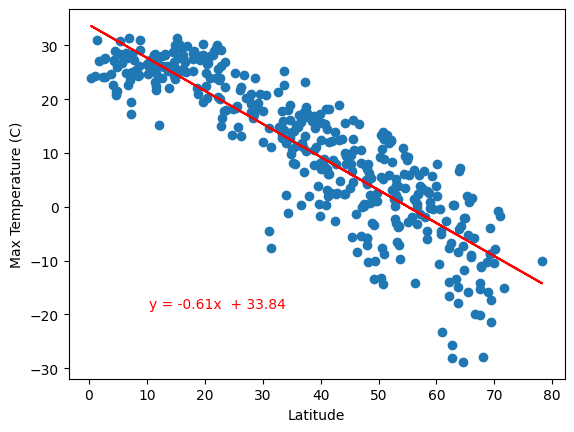

In [40]:
# Linear regression on Northern Hemisphere
lin_regress_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')

The r-squared is 0.5547144303146325


Text(0, 0.5, 'Max Temperature (C)')

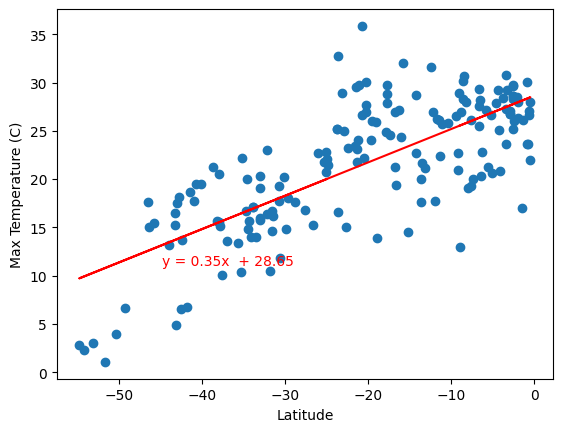

In [41]:
# Linear regression on Southern Hemisphere
lin_regress_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')

**Discussion about the linear relationship:** With a r-squared of .38 there isn't a massive correlation between Latitude and Max Temperature in the Southern Hemisphere however with a r squard of .75 there is a pretty high correlation between Latitude and Max Temperature in the Northern Hemisphere. The Southern Hemisphere linear relationship tells me that for every point of Latitude we gain the max temperature increases by 0.31 degrees celsius and the Northern Hemisphere relationship is much more steep with every point of Latitude we lose going away from the equater we lose 0.59 degress celsius. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is 0.06442292284307267


Text(0, 0.5, 'Humidity')

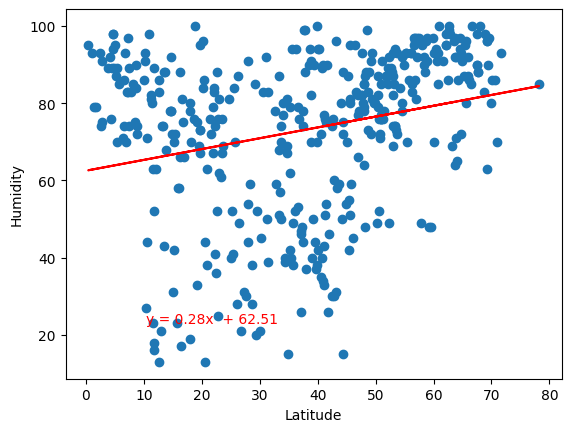

In [42]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')

The r-squared is 0.05928440950534208


Text(0, 0.5, 'Humidity')

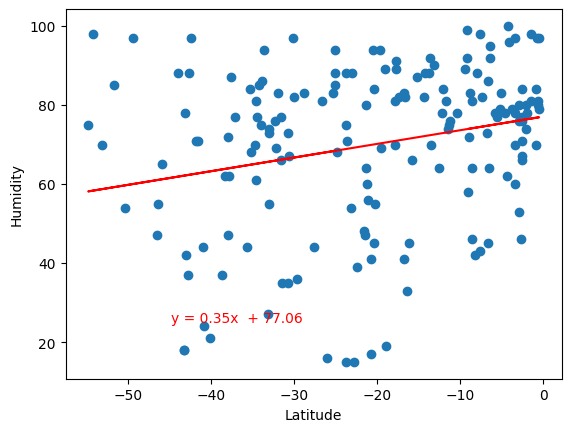

In [43]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')

**Discussion about the linear relationship:** With a r-squared of .03 in the southern hemisphere and a .04 in the nothern there isn't really a correlation between Latitude and Humidity. The Southern Hemisphere linear relationship tells me that for every point of Latitude we gain 0.26 more humidity and the Northern Hemisphere relationship is pretty similar with every point of Latitude we gain we gain 0.20 more humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is 0.030007099633504633


Text(0, 0.5, 'Cloudiness')

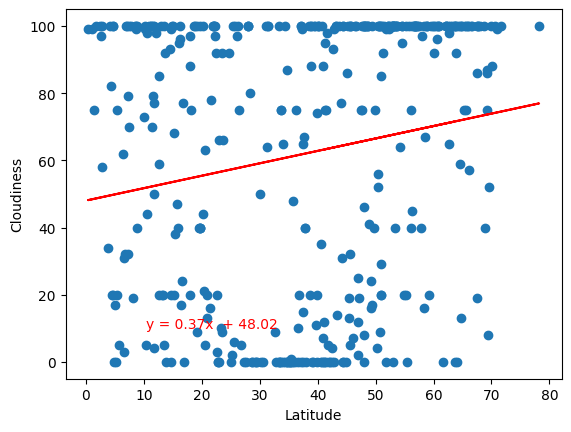

In [44]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

The r-squared is 0.003559885742510524


Text(0, 0.5, 'Cloudiness')

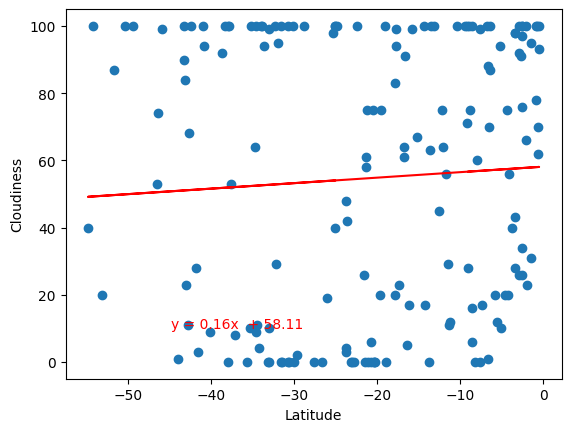

In [45]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** With an r-squared of around 0.04 in both the northern and southern this tells me that there isn't a correlation between latitude and cloudiness. This is further supported with the linear regression line in both of the plots. For both hemisphere's as we gain latitidue we go up around 0.5 couldiness which isn't that steep of a relationship. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is 0.012957103901836383


Text(0, 0.5, 'Wind Speed')

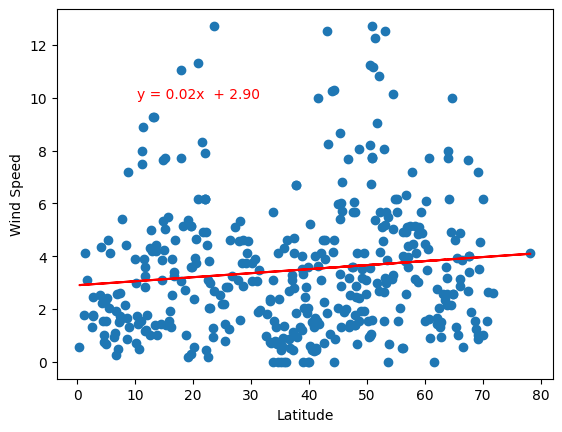

In [46]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

The r-squared is 0.16945831375477333


Text(0, 0.5, 'Wind Speed')

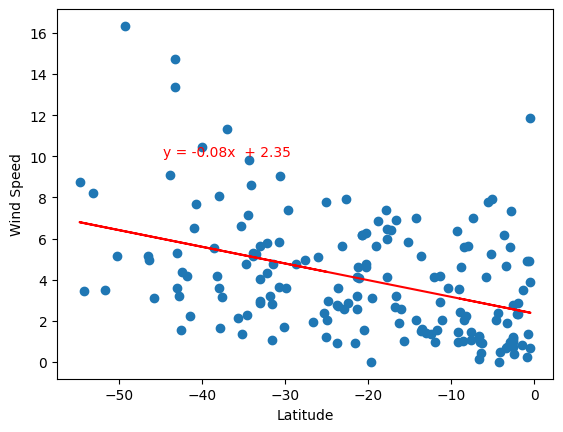

In [47]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** With a r-squared of 0.005 the nothern hemisphere basically has no correlation between Wind Speed and Latitude. The southern hemisphere has an r-squared of 0.04 so even though the value is higher there still really isn't a correlation. To me these graphs support the idea of little to no correlation the most as both of the slopes of the graphs are quite low, 0.01 for the nothern and -0.04 for the southern. 